In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [21]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\git_exercise\\CAT\\updated.csv', index_col=0)

In [22]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,StudentAbility
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,8.188
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.311
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,10.569
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,13.338
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,13.207


In [23]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,StudentAbility
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,...,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1000.000000
mean,0.516966,0.526946,0.303393,0.479042,0.745509,0.166667,0.424152,0.422156,0.527944,0.924152,...,0.701597,0.341317,0.499002,0.809381,0.367265,0.109780,0.177645,0.661677,0.427146,10.471585
std,0.499462,0.499024,0.459494,0.499311,0.435358,0.372493,0.493967,0.493656,0.498969,0.264626,...,0.457329,0.473915,0.499749,0.392594,0.481819,0.312462,0.382024,0.472903,0.494417,1.692988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.055000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.283500
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.249500,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.462000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,11.566750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.951000


In [24]:
df1 = df.transpose()

In [25]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,ResponseAccuracy,QuestionDifficulty
Q1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.517,0.483
Q2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.527,0.473
Q3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303,0.697
Q4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.479,0.521
Q5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.746,0.254


In [26]:
X = df1.drop('QuestionDifficulty', axis=1)
Y = df1['QuestionDifficulty']

In [48]:
X_train, X_test, Y_train, Y_test = X.head(40), X.tail(11), Y.head(40), Y.tail(11)
# train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_test = X_test.drop('StudentAbility', axis=0)
Y_test = Y_test.drop('StudentAbility', axis=0)

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.fit_transform(X_test)

In [108]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [109]:
model.fit(x=X_train, y=Y_train, epochs=250, validation_data=(X_test, Y_test))

Epoch 1/250
2/2 [==============================] - 0s 72ms/step - loss: 0.5107 - val_loss: 0.2619
Epoch 2/250
2/2 [==============================] - 0s 25ms/step - loss: 0.4069 - val_loss: 0.2083
Epoch 3/250
2/2 [==============================] - 0s 22ms/step - loss: 0.3280 - val_loss: 0.1853
Epoch 4/250
2/2 [==============================] - 0s 21ms/step - loss: 0.2128 - val_loss: 0.1675
Epoch 5/250
2/2 [==============================] - 0s 24ms/step - loss: 0.2237 - val_loss: 0.1608
Epoch 6/250
2/2 [==============================] - 0s 24ms/step - loss: 0.1945 - val_loss: 0.1548
Epoch 7/250
2/2 [==============================] - 0s 31ms/step - loss: 0.2075 - val_loss: 0.1572
Epoch 8/250
2/2 [==============================] - 0s 36ms/step - loss: 0.1341 - val_loss: 0.1654
Epoch 9/250
2/2 [==============================] - 0s 32ms/step - loss: 0.1473 - val_loss: 0.1615
Epoch 10/250
2/2 [==============================] - 0s 28ms/step - loss: 0.1306 - val_loss: 0.1549
Epoch 11/250
2/2 [=

Epoch 84/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0177 - val_loss: 0.0476
Epoch 85/250
2/2 [==============================] - 0s 27ms/step - loss: 0.0225 - val_loss: 0.0471
Epoch 86/250
2/2 [==============================] - 0s 21ms/step - loss: 0.0136 - val_loss: 0.0457
Epoch 87/250
2/2 [==============================] - 0s 21ms/step - loss: 0.0246 - val_loss: 0.0441
Epoch 88/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0284 - val_loss: 0.0450
Epoch 89/250
2/2 [==============================] - 0s 18ms/step - loss: 0.0210 - val_loss: 0.0467
Epoch 90/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0225 - val_loss: 0.0481
Epoch 91/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0353 - val_loss: 0.0490
Epoch 92/250
2/2 [==============================] - 0s 19ms/step - loss: 0.0186 - val_loss: 0.0489
Epoch 93/250
2/2 [==============================] - 0s 21ms/step - loss: 0.0187 - val_loss: 0.0484
Epoch 94/2

Epoch 166/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0219 - val_loss: 0.0457
Epoch 167/250
2/2 [==============================] - 0s 22ms/step - loss: 0.0214 - val_loss: 0.0455
Epoch 168/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0189 - val_loss: 0.0459
Epoch 169/250
2/2 [==============================] - 0s 18ms/step - loss: 0.0226 - val_loss: 0.0463
Epoch 170/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0184 - val_loss: 0.0463
Epoch 171/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0147 - val_loss: 0.0462
Epoch 172/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0201 - val_loss: 0.0462
Epoch 173/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0207 - val_loss: 0.0463
Epoch 174/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0181 - val_loss: 0.0471
Epoch 175/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0179 - val_loss: 0.0481


Epoch 248/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0213 - val_loss: 0.0468
Epoch 249/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0197 - val_loss: 0.0475
Epoch 250/250
2/2 [==============================] - 0s 20ms/step - loss: 0.0208 - val_loss: 0.0478


In [110]:
losses = pd.DataFrame(model.history.history)

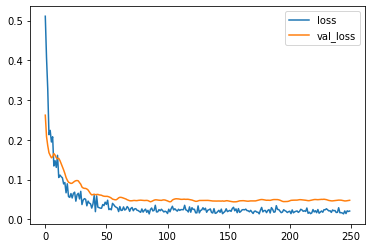

In [111]:
losses.plot()

In [112]:
predictions = model.predict(X_test)

In [132]:
predictions.shape

(10, 1)

In [115]:
student = df1.drop('QuestionDifficulty', axis=1).iloc[1]

In [119]:
student = scaler.transform(student.values.reshape(-1, 1001))

In [120]:
model.predict(student)

array([[0.40350946]])

In [123]:
df1.iloc[1]

0                     1.000
1                     1.000
2                     1.000
3                     1.000
4                     0.000
                      ...  
997                   1.000
998                   1.000
999                   0.000
ResponseAccuracy      0.527
QuestionDifficulty    0.473
Name: Q2, Length: 1002, dtype: float64

In [125]:
np.sqrt(mean_squared_error(Y_test,  predictions))

0.21860779988262444

In [133]:
# END OF LINE

In [104]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(50, 900)))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='relu'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# model.fit(X_train, X_train, epochs=100, validation_data=(X_test, Y_test))

In [29]:
Data = [[[(i + j) / 100] for i in range(5)] for j in range(100)]
target = [(i + 5) / 100 for i in range(100)]

In [30]:
data = np.array(Data, dtype=float)

In [31]:
data.shape

(100, 5, 1)

In [32]:
target = np.array(target, dtype=float)

In [33]:
target.shape

(100,)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [77]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, 100, 900), return_sequences=True))
model.add(LSTM((1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1001, 1)           3608      
_________________________________________________________________
lstm_7 (LSTM)                (None, 1)                 12        
Total params: 3,620
Trainable params: 3,620
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(X_train, Y_train, epochs=400, validation_data=(X_test, Y_test))

Epoch 1/400


ValueError: in user code:

    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 1001]


In [58]:
predictions = model.predict(X_test)

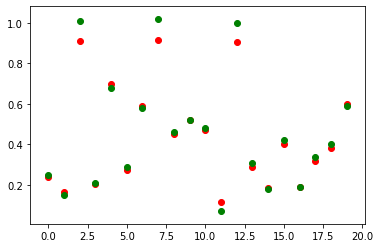

In [59]:
plt.scatter(range(20), predictions, c='r')
plt.scatter(range(20), Y_test, c='g')

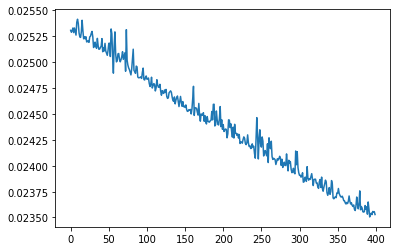

In [60]:
plt.plot(history.history['loss'])